In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
train_path = '../datasets/foodtruck/foodtruck-rand-hout-tra.arff'
test_path = '../datasets/foodtruck/foodtruck-rand-hout-tst.arff'
num_features = 21

train_data = arff.load(open(train_path, 'rt'))
col_names = [x[0] for x in train_data['attributes']]
train_data_arr = np.array(train_data['data'])
train_data_arr = np.vstack([np.array(col_names), train_data_arr])
np.savetxt('../datasets/foodtruck/train.csv', train_data_arr, fmt='%s', delimiter=',')
train_df = pd.read_csv('../datasets/foodtruck/train.csv')
train_df['time'].replace(['lunch', 'afternoon', 'happy_hour', 'dinner', 'dawn'], [0, 1, 2, 3, 4], inplace=True)
train_df['motivation'].replace(['ads', 'by_chance', 'friend', 'social_network', 'web'], [0, 1, 2, 3, 4], inplace=True)
train_df['marital.status'].replace(['divorced', 'married', 'single'], [0, 1, 2], inplace=True)
train_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
for c in train_df.columns:
    train_df[c] = train_df[c].astype('float')
train_data = train_df.to_numpy()

test_data = arff.load(open(test_path, 'rt'))
col_names = [x[0] for x in test_data['attributes']]
test_data_arr = np.array(test_data['data'])
test_data_arr = np.vstack([np.array(col_names), test_data_arr])
np.savetxt('../datasets/foodtruck/test.csv', train_data_arr, fmt='%s', delimiter=',')
test_df = pd.read_csv('../datasets/foodtruck/test.csv')
test_df['time'].replace(['lunch', 'afternoon', 'happy_hour', 'dinner', 'dawn'], [0, 1, 2, 3, 4], inplace=True)
test_df['motivation'].replace(['ads', 'by_chance', 'friend', 'social_network', 'web'], [0, 1, 2, 3, 4], inplace=True)
test_df['marital.status'].replace(['divorced', 'married', 'single'], [0, 1, 2], inplace=True)
test_df['gender'].replace(['F', 'M'], [0, 1], inplace=True)
for c in test_df.columns:
    test_df[c] = test_df[c].astype('float')
test_data = test_df.to_numpy()

print("Before converting to spikes: ")
print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

Before converting to spikes: 
Train data shape:  (250, 33)
Test data shape:  (250, 33)


100%|██████████| 250/250 [00:00<00:00, 8793.75it/s]

Train data shape:  (250, 1, 126)
Train labels shape:  (250, 12)
Test data shape:  (250, 1, 126)
Test labels shape:  (250, 12)


## DSLL Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (250, 1, 126)
Train Labels shape is  (250, 4)
Classes trained are: 0 to 4


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 9, class 0 neurons = 7
Class 1, class 1 neurons = 3, class 0 neurons = 11
Class 2, class 1 neurons = 3, class 0 neurons = 13
Class 3, class 1 neurons = 8, class 0 neurons = 9
Class 4, class 1 neurons = 0, class 0 neurons = 0
Class 5, class 1 neurons = 0, class 0 neurons = 0
Class 6, class 1 neurons = 0, class 0 neurons = 0
Class 7, class 1 neurons = 0, class 0 neurons = 0
Class 8, class 1 neurons = 0, class 0 neurons = 0
Class 9, class 1 neurons = 0, class 0 neurons = 0
Class 10, class 1 neurons = 0, class 0 neurons = 0
Class 11, class 1 neurons = 0, class 0 neurons = 0


100%|██████████| 5000/5000 [11:00:40<00:00,  7.93s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.027    |
| zero_one_loss       | 0.108    |
| one_error           | 0        |
| micro av. jaccard   | 0.920354 |
| macro av. jaccard   | 0.87274  |
| micro av. precision | 0.971963 |
| macro av. precision | 0.973912 |
| micro av. recall    | 0.945455 |
| macro av. recall    | 0.895856 |
| micro av. f1        | 0.958525 |
| macro av. f1        | 0.929272 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.027    |
| zero_one_loss       | 0.108    |
| one_error           | 0        |
| micro av. jaccard   | 0.920354 |
| macro av. jaccard   | 0.87274  |
| micro av. precision | 0.971963 |
| macro av. precision | 0.973912 |


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 17, class 0 neurons = 11
Class 1, class 1 neurons = 6, class 0 neurons = 21
Class 2, class 1 neurons = 3, class 0 neurons = 19
Class 3, class 1 neurons = 13, class 0 neurons = 17
Class 4, class 1 neurons = 4, class 0 neurons = 13
Class 5, class 1 neurons = 2, class 0 neurons = 14
Class 6, class 1 neurons = 5, class 0 neurons = 14
Class 7, class 1 neurons = 5, class 0 neurons = 12
Class 8, class 1 neurons = 0, class 0 neurons = 0
Class 9, class 1 neurons = 0, class 0 neurons = 0
Class 10, class 1 neurons = 0, class 0 neurons = 0
Class 11, class 1 neurons = 0, class 0 neurons = 0


100%|██████████| 5000/5000 [28:08:12<00:00, 20.26s/it]   


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.008    |
| zero_one_loss       | 0.028    |
| one_error           | 0        |
| micro av. jaccard   | 0.876923 |
| macro av. jaccard   | 0.880682 |
| micro av. precision | 1        |
| macro av. precision | 1        |
| micro av. recall    | 0.876923 |
| macro av. recall    | 0.880682 |
| micro av. f1        | 0.934426 |
| macro av. f1        | 0.933761 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 8) (250, 8)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.0175   |
| zero_one_loss       | 0.128    |
| one_error           | 0        |
| micro av. jaccard   | 0.913366 |
| macro av. jaccard   | 0.876711 |
| micro av. precision | 0.97619  |
| macro av. precision | 0.986956 |


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 22, class 0 neurons = 14
Class 1, class 1 neurons = 10, class 0 neurons = 27
Class 2, class 1 neurons = 3, class 0 neurons = 22
Class 3, class 1 neurons = 13, class 0 neurons = 18
Class 4, class 1 neurons = 5, class 0 neurons = 18
Class 5, class 1 neurons = 2, class 0 neurons = 17
Class 6, class 1 neurons = 5, class 0 neurons = 15
Class 7, class 1 neurons = 5, class 0 neurons = 13
Class 8, class 1 neurons = 6, class 0 neurons = 12
Class 9, class 1 neurons = 4, class 0 neurons = 13
Class 10, class 1 neurons = 6, class 0 neurons = 12
Class 11, class 1 neurons = 6, class 0 neurons = 12


100%|██████████| 5000/5000 [23:11:31<00:00, 16.70s/it]   


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.012    |
| zero_one_loss       | 0.044    |
| one_error           | 0        |
| micro av. jaccard   | 0.928994 |
| macro av. jaccard   | 0.883505 |
| micro av. precision | 1        |
| macro av. precision | 1        |
| micro av. recall    | 0.928994 |
| macro av. recall    | 0.883505 |
| micro av. f1        | 0.96319  |
| macro av. f1        | 0.935989 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 12) (250, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0156667 |
| zero_one_loss       | 0.164     |
| one_error           | 0         |
| micro av. jaccard   | 0.917976  |
| macro av. jaccard   | 0.878976  |
| micro av. precision | 0.983178  |
| macro av. precision | 0

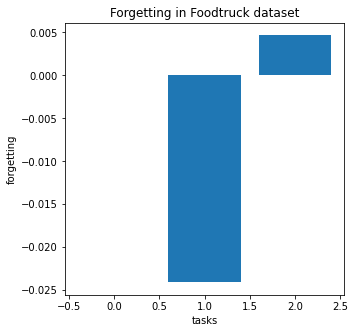

In [3]:
hparams_dict = {
    'inputs': 126,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.48,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 5000,
    'print_every': 500,
    'name': 'Foodtruck',
    'tasks': {'samples': None, 'labels': [4, 4, 4]},
    'seed': 2,
    'ckpt_dir': './checkpoints/foodtruck',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (250, 1, 126)
Train Labels shape is  (250, 4)
Classes trained are: 0 to 4


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 14
Class 1, class 1 neurons = 4, class 0 neurons = 13
Class 2, class 1 neurons = 3, class 0 neurons = 11
Class 3, class 1 neurons = 3, class 0 neurons = 13
Class 4, class 1 neurons = 0, class 0 neurons = 0
Class 5, class 1 neurons = 0, class 0 neurons = 0
Class 6, class 1 neurons = 0, class 0 neurons = 0
Class 7, class 1 neurons = 0, class 0 neurons = 0
Class 8, class 1 neurons = 0, class 0 neurons = 0
Class 9, class 1 neurons = 0, class 0 neurons = 0
Class 10, class 1 neurons = 0, class 0 neurons = 0
Class 11, class 1 neurons = 0, class 0 neurons = 0


100%|██████████| 5000/5000 [2:23:50<00:00,  1.73s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.38     |
| zero_one_loss       | 0.916    |
| one_error           | 0.02     |
| micro av. jaccard   | 0.088729 |
| macro av. jaccard   | 0.113999 |
| micro av. precision | 0.298387 |
| macro av. precision | 0.445811 |
| micro av. recall    | 0.112121 |
| macro av. recall    | 0.215781 |
| micro av. f1        | 0.162996 |
| macro av. f1        | 0.20011  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.38     |
| zero_one_loss       | 0.916    |
| one_error           | 0.02     |
| micro av. jaccard   | 0.088729 |
| macro av. jaccard   | 0.113999 |
| micro av. precision | 0.298387 |
| macro av. precision | 0.445811 |


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 17
Class 1, class 1 neurons = 5, class 0 neurons = 18
Class 2, class 1 neurons = 7, class 0 neurons = 19
Class 3, class 1 neurons = 4, class 0 neurons = 20
Class 4, class 1 neurons = 8, class 0 neurons = 9
Class 5, class 1 neurons = 6, class 0 neurons = 12
Class 6, class 1 neurons = 4, class 0 neurons = 13
Class 7, class 1 neurons = 5, class 0 neurons = 14
Class 8, class 1 neurons = 0, class 0 neurons = 0
Class 9, class 1 neurons = 0, class 0 neurons = 0
Class 10, class 1 neurons = 0, class 0 neurons = 0
Class 11, class 1 neurons = 0, class 0 neurons = 0


100%|██████████| 5000/5000 [5:34:14<00:00,  4.01s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.124    |
| zero_one_loss       | 0.312    |
| one_error           | 0.012    |
| micro av. jaccard   | 0.120567 |
| macro av. jaccard   | 0.111975 |
| micro av. precision | 0.182796 |
| macro av. precision | 0.175824 |
| micro av. recall    | 0.261538 |
| macro av. recall    | 0.242832 |
| micro av. f1        | 0.21519  |
| macro av. f1        | 0.198926 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 8) (250, 8)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.2515    |
| zero_one_loss       | 0.936     |
| one_error           | 0         |
| micro av. jaccard   | 0.0969479 |
| macro av. jaccard   | 0.113177  |
| micro av. precision | 0.25      |
| macro av. precision | 0.3

  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 17
Class 1, class 1 neurons = 5, class 0 neurons = 19
Class 2, class 1 neurons = 9, class 0 neurons = 23
Class 3, class 1 neurons = 4, class 0 neurons = 21
Class 4, class 1 neurons = 12, class 0 neurons = 17
Class 5, class 1 neurons = 6, class 0 neurons = 13
Class 6, class 1 neurons = 5, class 0 neurons = 18
Class 7, class 1 neurons = 5, class 0 neurons = 15
Class 8, class 1 neurons = 6, class 0 neurons = 12
Class 9, class 1 neurons = 5, class 0 neurons = 12
Class 10, class 1 neurons = 6, class 0 neurons = 12
Class 11, class 1 neurons = 3, class 0 neurons = 11


100%|██████████| 5000/5000 [8:37:34<00:00,  6.21s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.118    |
| zero_one_loss       | 0.412    |
| one_error           | 0        |
| micro av. jaccard   | 0.458716 |
| macro av. jaccard   | 0.532384 |
| micro av. precision | 0.671141 |
| macro av. precision | 0.655033 |
| micro av. recall    | 0.591716 |
| macro av. recall    | 0.572763 |
| micro av. f1        | 0.628931 |
| macro av. f1        | 0.609572 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 12) (250, 12)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.207    |
| zero_one_loss       | 0.968    |
| one_error           | 0        |
| micro av. jaccard   | 0.19871  |
| macro av. jaccard   | 0.252912 |
| micro av. precision | 0.421918 |
| macro av. precision | 0.425727 

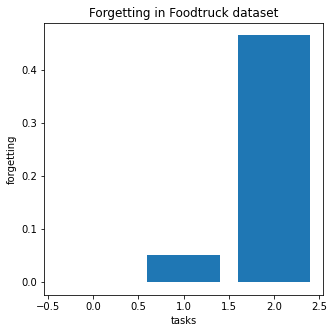

In [4]:
hparams_dict = {
    'inputs': 126,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.48,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 5000,
    'print_every': 500,
    'name': 'Foodtruck',
    'tasks': {'samples': None, 'labels': [4, 4, 4]},
    'seed': 3,
    'ckpt_dir': './checkpoints/foodtruck',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (250, 1, 126)
Train Labels shape is  (250, 4)
Classes trained are: 0 to 4


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 8, class 0 neurons = 9
Class 1, class 1 neurons = 4, class 0 neurons = 13
Class 2, class 1 neurons = 5, class 0 neurons = 14
Class 3, class 1 neurons = 4, class 0 neurons = 13
Class 4, class 1 neurons = 0, class 0 neurons = 0
Class 5, class 1 neurons = 0, class 0 neurons = 0
Class 6, class 1 neurons = 0, class 0 neurons = 0
Class 7, class 1 neurons = 0, class 0 neurons = 0
Class 8, class 1 neurons = 0, class 0 neurons = 0
Class 9, class 1 neurons = 0, class 0 neurons = 0
Class 10, class 1 neurons = 0, class 0 neurons = 0
Class 11, class 1 neurons = 0, class 0 neurons = 0


100%|██████████| 5000/5000 [2:32:53<00:00,  1.83s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.333    |
| zero_one_loss       | 0.936    |
| one_error           | 0        |
| micro av. jaccard   | 0.119048 |
| macro av. jaccard   | 0.104785 |
| micro av. precision | 0.483871 |
| macro av. precision | 0.424944 |
| micro av. recall    | 0.136364 |
| macro av. recall    | 0.127677 |
| micro av. f1        | 0.212766 |
| macro av. f1        | 0.188031 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.333    |
| zero_one_loss       | 0.936    |
| one_error           | 0        |
| micro av. jaccard   | 0.119048 |
| macro av. jaccard   | 0.104785 |
| micro av. precision | 0.483871 |
| macro av. precision | 0.424944 |


  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 13, class 0 neurons = 17
Class 1, class 1 neurons = 5, class 0 neurons = 18
Class 2, class 1 neurons = 5, class 0 neurons = 15
Class 3, class 1 neurons = 4, class 0 neurons = 15
Class 4, class 1 neurons = 4, class 0 neurons = 13
Class 5, class 1 neurons = 9, class 0 neurons = 7
Class 6, class 1 neurons = 6, class 0 neurons = 12
Class 7, class 1 neurons = 5, class 0 neurons = 14
Class 8, class 1 neurons = 0, class 0 neurons = 0
Class 9, class 1 neurons = 0, class 0 neurons = 0
Class 10, class 1 neurons = 0, class 0 neurons = 0
Class 11, class 1 neurons = 0, class 0 neurons = 0


100%|██████████| 5000/5000 [6:36:01<00:00,  4.75s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.307     |
| zero_one_loss       | 0.828     |
| one_error           | 0.004     |
| micro av. jaccard   | 0.0943953 |
| macro av. jaccard   | 0.250076  |
| micro av. precision | 0.104575  |
| macro av. precision | 0.326243  |
| micro av. recall    | 0.492308  |
| macro av. recall    | 0.470105  |
| micro av. f1        | 0.172507  |
| macro av. f1        | 0.320879  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 8) (250, 8)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.32     |
| zero_one_loss       | 0.964    |
| one_error           | 0        |
| micro av. jaccard   | 0.107392 |
| macro av. jaccard   | 0.177431 |
| micro av. precision | 0.192982 |
| macro av. precision 

  0%|          | 0/5000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 13, class 0 neurons = 21
Class 1, class 1 neurons = 5, class 0 neurons = 19
Class 2, class 1 neurons = 5, class 0 neurons = 16
Class 3, class 1 neurons = 4, class 0 neurons = 17
Class 4, class 1 neurons = 5, class 0 neurons = 18
Class 5, class 1 neurons = 17, class 0 neurons = 11
Class 6, class 1 neurons = 10, class 0 neurons = 20
Class 7, class 1 neurons = 5, class 0 neurons = 15
Class 8, class 1 neurons = 2, class 0 neurons = 14
Class 9, class 1 neurons = 6, class 0 neurons = 12
Class 10, class 1 neurons = 9, class 0 neurons = 7
Class 11, class 1 neurons = 5, class 0 neurons = 12


100%|██████████| 5000/5000 [10:26:31<00:00,  7.52s/it] 


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 4) (250, 4)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.34      |
| zero_one_loss       | 0.868     |
| one_error           | 0         |
| micro av. jaccard   | 0.0607735 |
| macro av. jaccard   | 0.0897619 |
| micro av. precision | 0.102326  |
| macro av. precision | 0.254258  |
| micro av. recall    | 0.130178  |
| macro av. recall    | 0.232257  |
| micro av. f1        | 0.114583  |
| macro av. f1        | 0.152835  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float64 int64
(250, 12) (250, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.326333  |
| zero_one_loss       | 1         |
| one_error           | 0         |
| micro av. jaccard   | 0.0918367 |
| macro av. jaccard   | 0.148254  |
| micro av. precision | 0.161501  |
| macro av. 

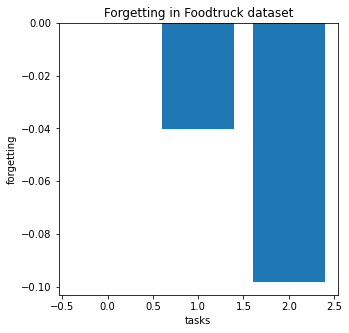

In [3]:
hparams_dict = {
    'inputs': 126,
    'outputs': 12,
    'time_constant': 300,
    'alpha_a': 0.48,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 5000,
    'print_every': 500,
    'name': 'Foodtruck',
    'tasks': {'samples': None, 'labels': [4, 4, 4]},
    'seed': 4,
    'ckpt_dir': './checkpoints/foodtruck',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)